### K means clustering - Market Segmentation

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
sns.set_style("darkgrid")

In [116]:
df1 = pd.read_csv('data/mall_customers.csv')

In [117]:
df1.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
df1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### from the description data looks fine interms of quantity as annual income and spending both are greater than zero. further age is greater than 18. 

In [7]:
df1['CustomerID'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

#### since this is a toy dataset, therefore analysis would be very simple, as no customer id is being repeated therefore it is safe to discard this feature.

In [118]:
df1 = df1.drop(['CustomerID'],axis = 1)

In [119]:
df1.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


### distribution of male and female in dataset

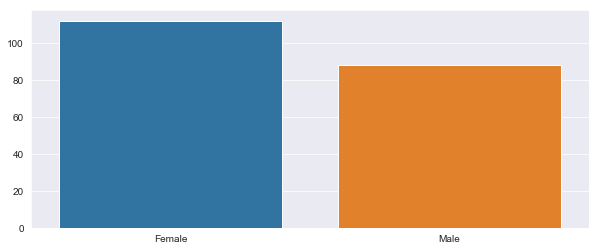

In [18]:
genders = df1.Gender.value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [120]:
df1.columns = df1.columns.str.strip().str.lower().str.replace(' ','_')

In [121]:
df1.head(5)

,gender,age,annual_income_(k$),spending_score_(1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### distribution of spending score versus gender

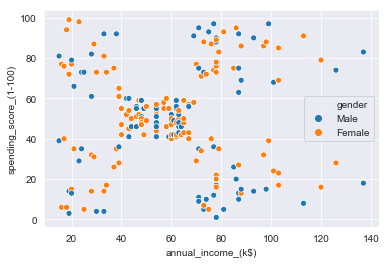

<Figure size 1080x288 with 0 Axes>

In [47]:
sns.scatterplot(x='annual_income_(k$)',y='spending_score_(1-100)',hue='gender',data=df1)
plt.figure(figsize=(15,4))
plt.show()

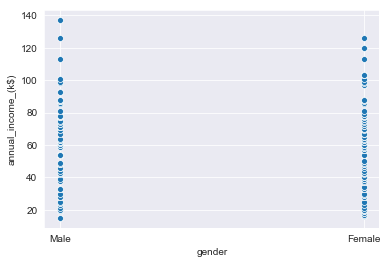

<Figure size 720x288 with 0 Axes>

In [39]:
sns.scatterplot(y ='annual_income_(k$)',x='gender',data=df1)
plt.figure(figsize=(10,4))
plt.show()

#### Finding the range of distribution of income and spending. Using boxplot to visulaize it.

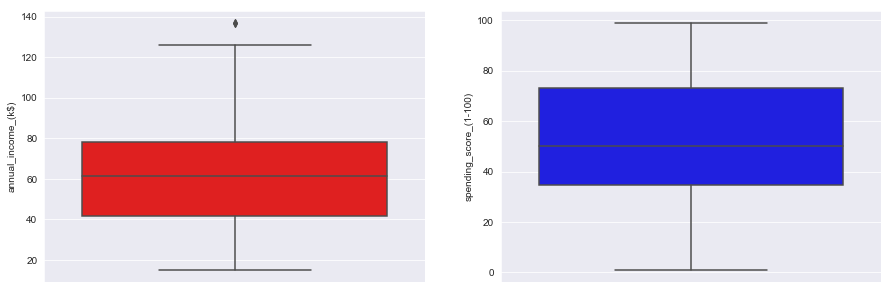

In [46]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=df1['annual_income_(k$)'],color = 'red')
plt.subplot(1,2,2)
sns.boxplot(y=df1['spending_score_(1-100)'],color='blue')

#### clearly spending score has wider range as compare to the distribution of annual income

### next i will try to visualize the distribution of age group,income and spending score

In [145]:
age1 = df1.age[(df1.age>=18) & (df1.age<=25)]
age2 = df1.age[(df1.age >=26) & (df1.age <=35)]
age3 = df1.age[(df1.age >=36) & (df1.age <=45)]
age4 = df1.age[(df1.age>=46) & (df1.age <= 55)]
age5 = df1.age[(df1.age >= 56)]

In [146]:
x = ['18-25','26-35','36-45','46-55','55+']
y = [len(age1.values),len(age2.values),len(age3.values),len(age4.values),len(age5.values)]

In [147]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)

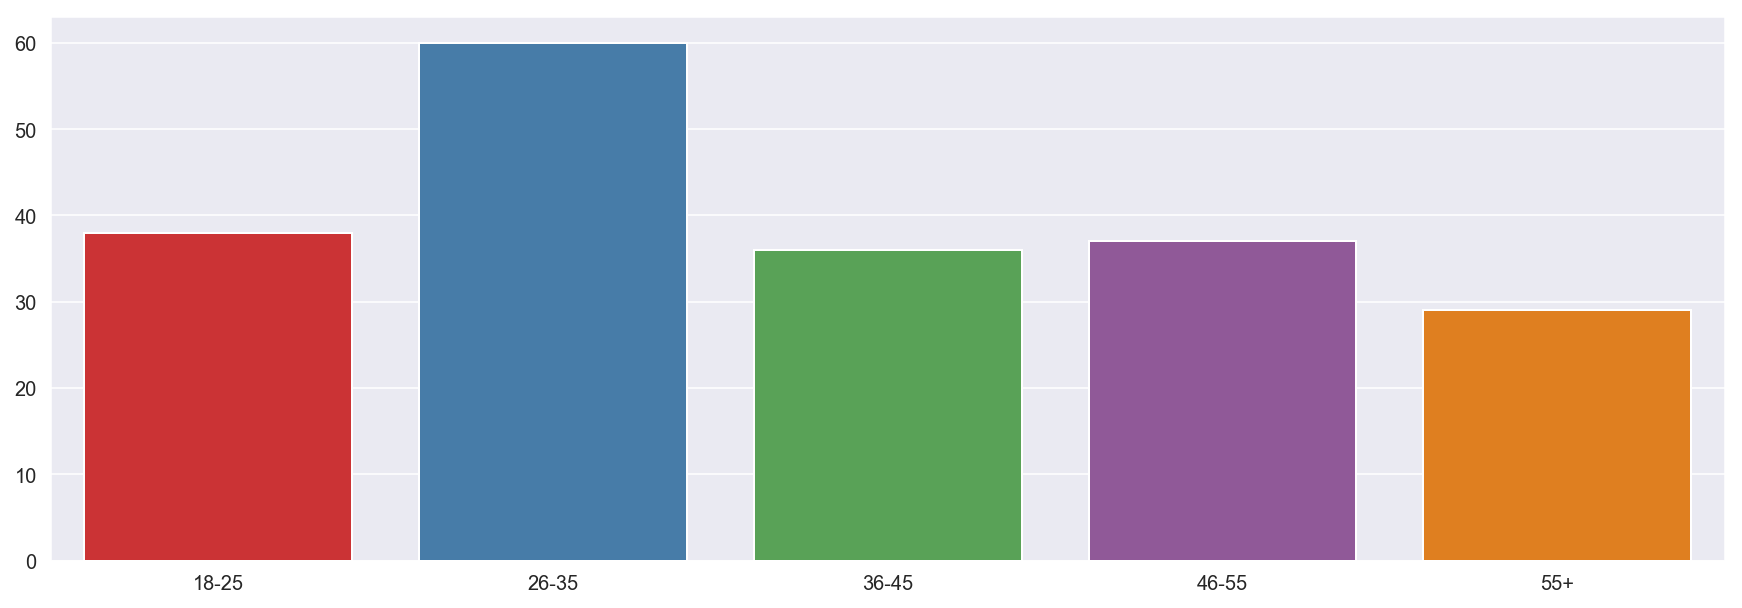

In [148]:
plt.figure(figsize=(15,5))
sns.barplot(x=x,y=y,palette = 'Set1')

#### visualizing income level

In [72]:
df1['annual_income_(k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137])

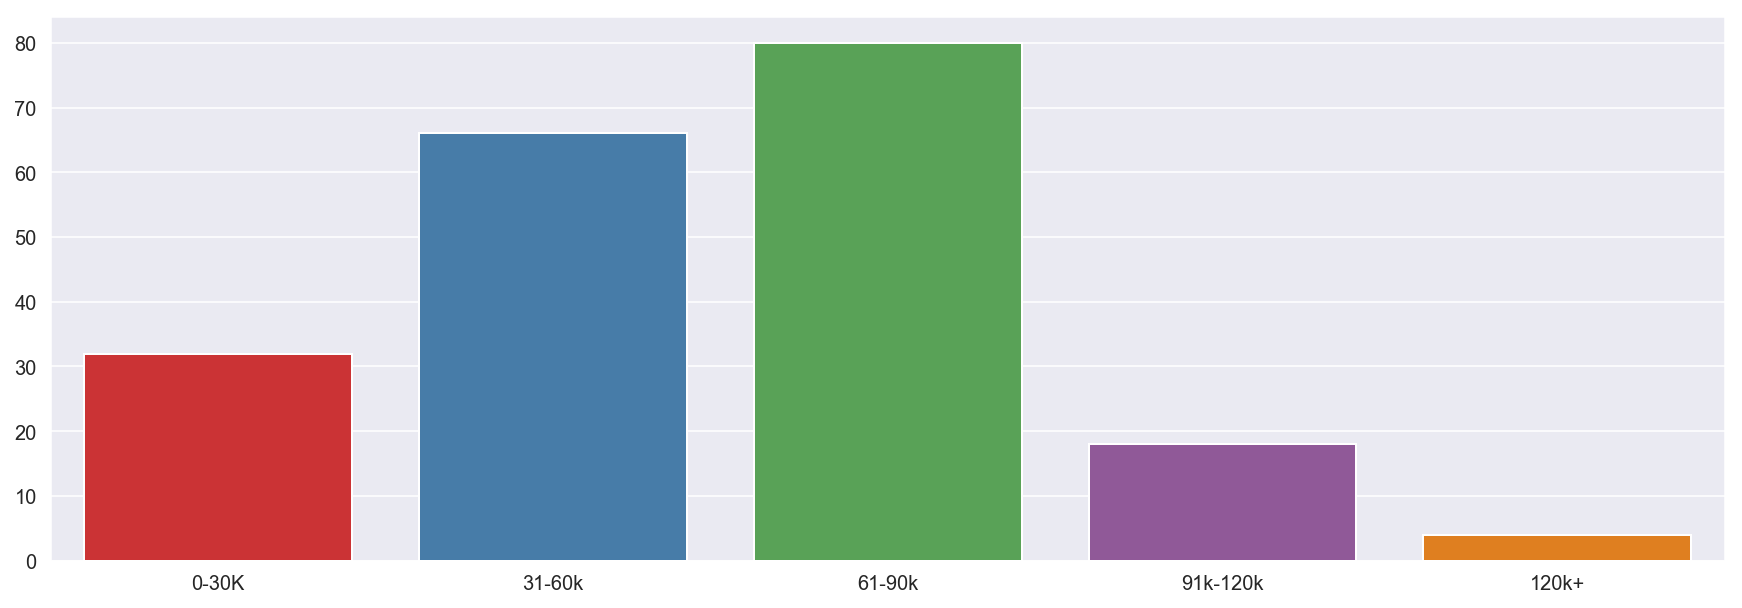

In [144]:
income1 = df1['annual_income_(k$)'][(df1['annual_income_(k$)'] >= 0) & (df1['annual_income_(k$)'] <= 30)]
income2 = df1['annual_income_(k$)'][(df1['annual_income_(k$)'] >= 31) & (df1['annual_income_(k$)'] <= 60)] 
income3 = df1['annual_income_(k$)'][(df1['annual_income_(k$)'] >= 61) & (df1['annual_income_(k$)'] <= 90)]
income4 = df1['annual_income_(k$)'][(df1['annual_income_(k$)'] >= 91) & (df1['annual_income_(k$)'] <= 120)]
income5 = df1['annual_income_(k$)'][(df1['annual_income_(k$)'] >= 121)]
x1 = ['0-30K','31-60k','61-90k','91k-120k','120k+']
y1 = [len(income1.values),len(income2.values),len(income3.values),len(income4.values),len(income5.values)]
plt.figure(figsize=(15,5))
sns.barplot(x=x1,y=y1,palette='Set1')

In [ ]:
#### visulazing spending score

In [100]:

df1['spending_score_(1-100)'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18])

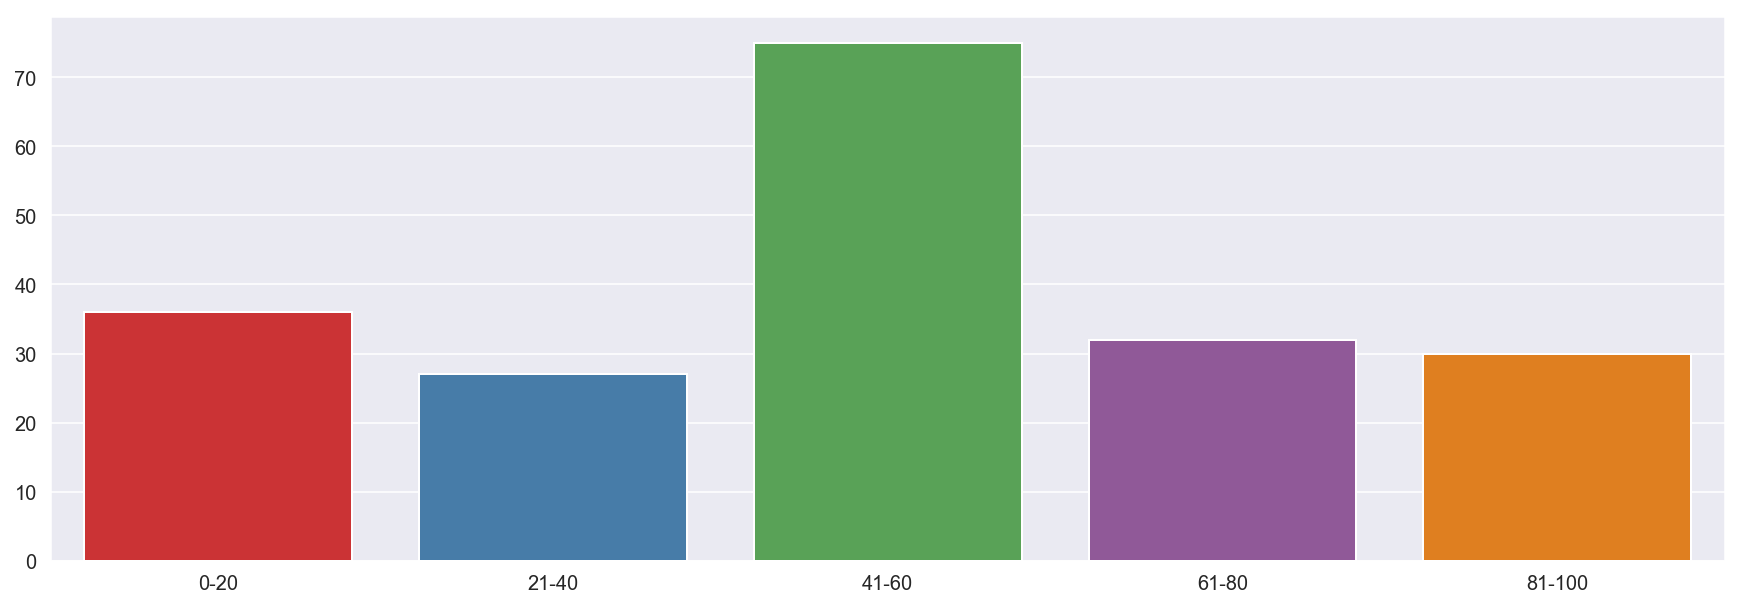

In [143]:
score1 = df1['spending_score_(1-100)'][(df1['spending_score_(1-100)'] >= 0) & (df1['spending_score_(1-100)'] <= 20)]
score2 = df1['spending_score_(1-100)'][(df1['spending_score_(1-100)'] >= 21) & (df1['spending_score_(1-100)'] <= 40)]
score3 = df1['spending_score_(1-100)'][(df1['spending_score_(1-100)'] >= 41) & (df1['spending_score_(1-100)'] <= 60)]
score4 = df1['spending_score_(1-100)'][(df1['spending_score_(1-100)'] >= 61) & (df1['spending_score_(1-100)'] <= 80)]
score5 = df1['spending_score_(1-100)'][(df1['spending_score_(1-100)'] >= 81) & (df1['spending_score_(1-100)'] <= 100)]

x = ['0-20','21-40','41-60','61-80','81-100']
y = [len(score1.values),len(score2.values),len(score3.values),len(score4.values),len(score5.values)]

plt.figure(figsize=(15,5))
sns.barplot(x=x,y=y,palette='Set1')

### hyper parameter tuning : finding optimal number of clusters

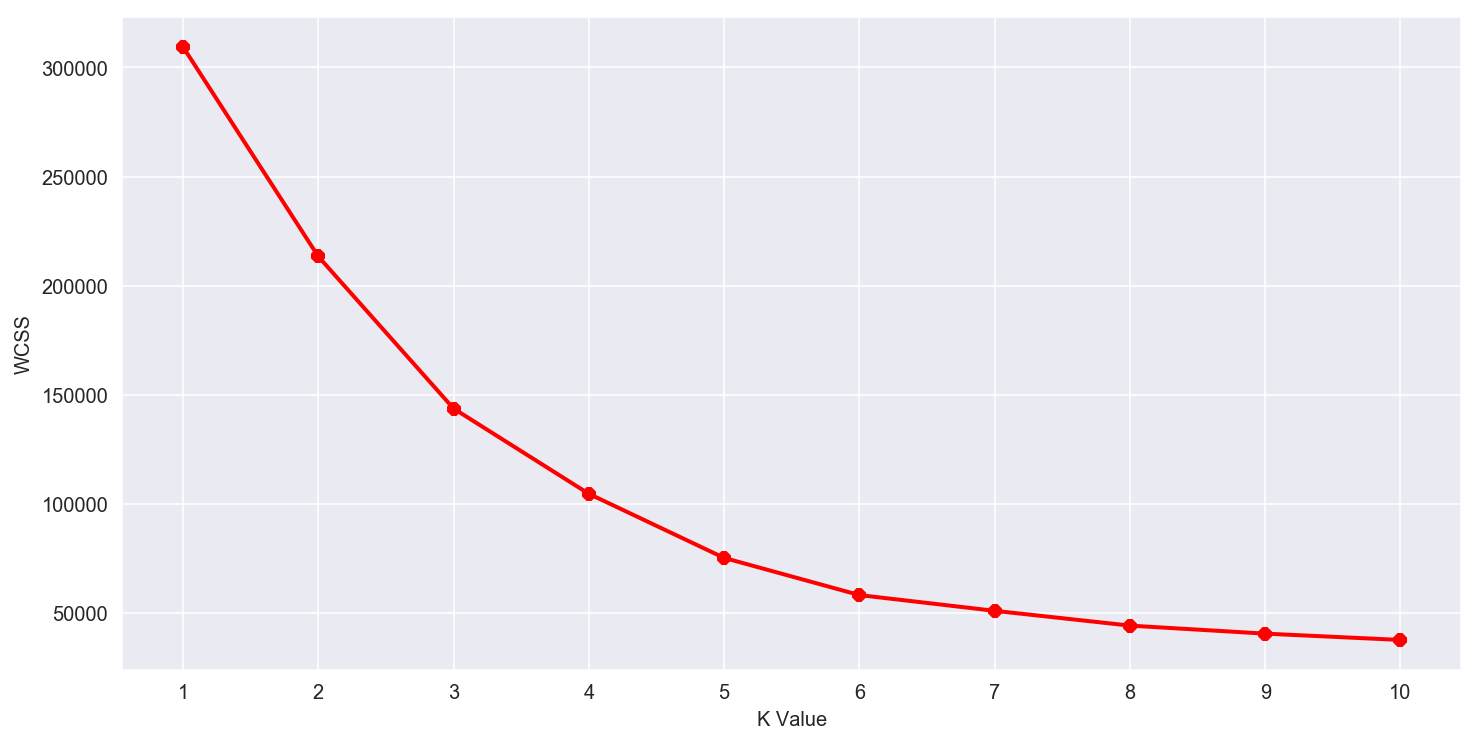

In [141]:
from sklearn.cluster import KMeans
import numpy as np
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df1.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [132]:
df1.head(5)

,gender,age,annual_income_(k$),spending_score_(1-100),label
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,3
3,Female,23,16,77,2
4,Female,31,17,40,3


In [131]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# for data preprocessing and clustering
from sklearn.cluster import KMeans

%matplotlib inline
# to include graphs inline within the frontends next to code

%config InlineBackend.figure_format='retina'
#to enable retina (high resolution) plots

pd.options.mode.chained_assignment = None

In [137]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df1.iloc[:,1:])
df1["label"] = clusters

In [138]:
df1["cluster_name"] = df1["label"].astype(str)

In [139]:


# visualize log_transformation customer segments with a 3D plot
fig = px.scatter_3d(df1,
                    x="age",
                    y="annual_income_(k$)",
                    z="spending_score_(1-100)",
                    color='cluster_name',
                    hover_data=["age",
                                "annual_income_(k$)",
                                "spending_score_(1-100)"],
                    category_orders = {"cluster_name": 
                                       ["0", "1", "2", "3",'4']},
                   
                    )

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

